In [1]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import Panel_GARCH
import pandas as pd
import numpy as np

## Importing the dataframe that contains the prices of the stocks:

In [2]:
df = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/prices_matrix.csv')
df.set_index(df.Date, inplace = True)
df = df.iloc[:, 1:]
display(df.head())

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,47.816002,NaN,NaN,0.790705,NaN,2.995442,18.37500,9.199702,NaN,16.693562,...,32.169292,21.356483,6.955813,35.156586,NaN,5.116380,NaN,26.000000,42.370888,NaN
2000-01-03,44.530334,NaN,NaN,0.860883,NaN,3.069404,18.25000,8.867177,NaN,16.274673,...,33.075779,20.760025,6.919012,37.481003,NaN,4.942523,NaN,25.027779,39.731110,NaN
2000-01-04,41.128731,NaN,NaN,0.788302,NaN,2.859848,17.81250,8.613833,NaN,14.909401,...,32.324043,20.362385,6.919012,35.737682,NaN,4.843174,NaN,24.666668,37.807178,NaN
2000-01-05,38.577507,NaN,NaN,0.799837,NaN,3.081731,18.00000,8.597999,NaN,15.204173,...,31.616535,21.472454,7.038618,37.577843,NaN,4.868011,NaN,25.138889,37.762455,NaN
2000-01-06,37.108631,NaN,NaN,0.730621,NaN,3.315943,18.03125,8.898850,NaN,15.328290,...,28.874968,22.582546,7.047821,36.803051,NaN,4.826617,NaN,23.777779,38.299366,NaN


### Checking the types of the columns with 'info' function:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5243 entries, 1999-12-31 to 2020-10-30
Columns: 504 entries, A to ZTS
dtypes: float64(504)
memory usage: 20.2+ MB


### Creating the dataframe that contains the log returns of the stocks:

In [4]:
returns = np.log(df).diff()
display(returns.head())

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.071190,NaN,NaN,0.085033,NaN,0.024391,-0.006826,-0.036815,NaN,-0.025413,...,0.027789,-0.028326,-0.005305,0.064022,NaN,-0.034571,NaN,-0.038110,-0.064327,NaN
2000-01-04,-0.079464,NaN,NaN,-0.088077,NaN,-0.070715,-0.024265,-0.028987,NaN,-0.087618,...,-0.022990,-0.019340,0.000000,-0.047629,NaN,-0.020305,NaN,-0.014533,-0.049636,NaN
2000-01-05,-0.064038,NaN,NaN,0.014527,NaN,0.074723,0.010471,-0.001840,NaN,0.019578,...,-0.022131,0.053082,0.017139,0.050209,NaN,0.005115,NaN,0.018963,-0.001184,NaN
2000-01-06,-0.038820,NaN,NaN,-0.090514,NaN,0.073251,0.001735,0.034393,NaN,0.008130,...,-0.090705,0.050406,0.001307,-0.020834,NaN,-0.008540,NaN,-0.055665,0.014118,NaN


# Panel GARCH modeling example:

In [5]:
model = Panel_GARCH()

We would like to receive parameters between 0.0 and 1.0, so the restrictions will be ['01', '01']. Let's say we want to model the first 1000 days. For optimization issues we need to multiply returns by 100, otherwise the optimizer can break.

In [6]:
model.fit(['01', '01'], returns[1:1001] * 100)

Loglikelihood:  948.4860074392099 

   Parameters  Standard Error  95% CI Lower  95% CI Higher
0    0.077829        0.003834      0.070315       0.085344
1    0.889760        0.003827      0.882260       0.897261


#### Let's see two stocks volatility with Panel GARCH's optimized parameters:

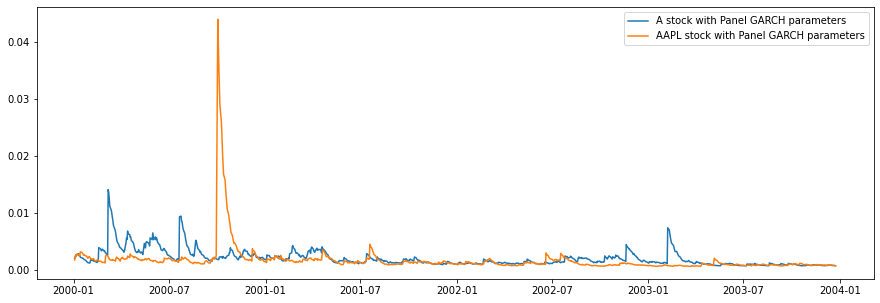

In [13]:
import matplotlib.pyplot as plt

A_fit = model.model_filter(model.optimized_params, returns.iloc[1:1001, 0].values)
AAPL_fit = model.model_filter(model.optimized_params, returns.iloc[1:1001, 3].values)
x_lim = returns[1:1001].index.astype('datetime64[ns]')

plt.figure(figsize = (15, 5))
plt.plot(x_lim, A_fit, label = "A stock with Panel GARCH's parameters")
plt.plot(x_lim, AAPL_fit, label = "AAPL stock with Panel GARCH's parameters")
plt.legend(loc = 'best')
plt.show()